<a href="https://colab.research.google.com/github/prashanth-manchana/upgrad-aiml/blob/main/Calculus_for_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Session Outline

1. Functions
2. Derivatives
3. Critical Points
3. Multivariable Calculus

#### Import libraries

In [ ]:
# Load library
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

Some Initial questions

1. What is a function?
2. If machine learning is about minimizing loss, what mathematical tool lets us find minima?
3. If speed of a car is constant, what is acceleration?
4. Can a function has no minima?

## **Calculus**

**Key Applications of calculus in ML/DL**

1. **Gradient Descent Optimization**: Calculus enables the computation of gradients, which are essential for optimization algorithms like gradient descent. By calculating the derivative of the loss function with respect to model parameters, we can iteratively adjust these parameters to minimize errors and improve model performance.

2. **Backpropagation in Neural Networks**: The backpropagation algorithm relies on calculus to compute the gradients of the loss function concerning each weight in the network. This process involves applying the chain rule to propagate errors backward through the network, facilitating efficient weight updates during training.

3. **Activation Function Analysis**: Calculus allows for the examination of activation functions by analyzing their derivatives. Understanding these derivatives is crucial for assessing how signals propagate through neurons and how they influence learning dynamics.

4. **Regularization Techniques**: Regularization methods, such as L1 and L2 regularization, incorporate calculus to add penalty terms to the loss function. These penalties, derived using derivatives, help prevent overfitting by discouraging overly complex models.

5. **Hyperparameter Optimization**: Calculus aids in understanding how changes in hyperparameters affect the model's performance. By analyzing the derivatives of performance metrics with respect to hyperparameters, we can fine-tune models more effectively.

Python Demo of Functions

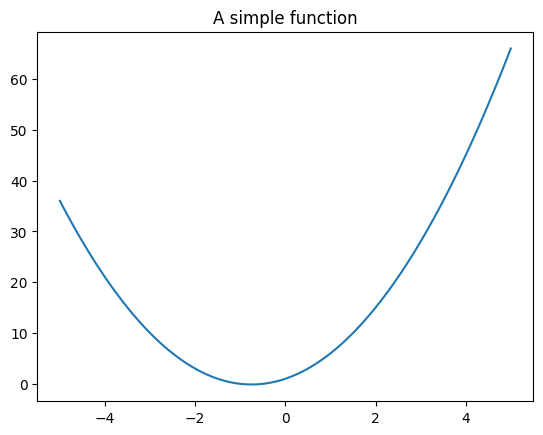

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2*x**2 + 3*x + 1

x = np.linspace(-5, 5, 100)
y = f(x)

plt.plot(x, y)
plt.title("A simple function")
plt.show()

- Where is it increasing?

- Where is it minimum?

- Why do we care?

#### Visualizing basic functions

In [ ]:
import sympy as sp
# Define a symbolic variable and function
x = sp.symbols('x')

<Figure size 500x500 with 0 Axes>

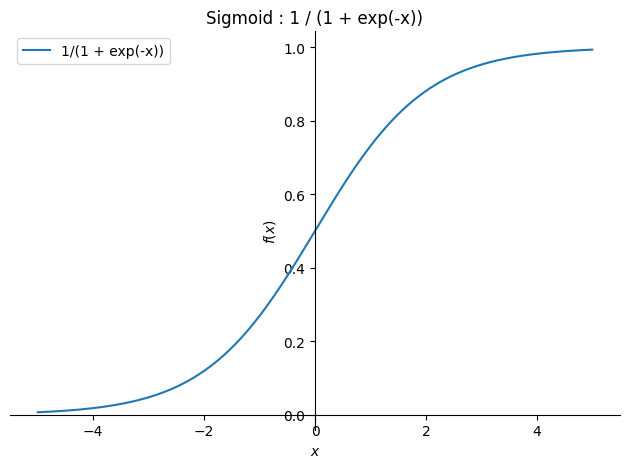

In [ ]:
f = 1 / (1 + sp.exp(-1*x))
plt.figure(figsize=(5,5))
p = sp.plot(
    f,
    (x, -5, 5),
    show=True,
    legend=True,
    title="Sigmoid : 1 / (1 + exp(-x))",
)

<Figure size 500x500 with 0 Axes>

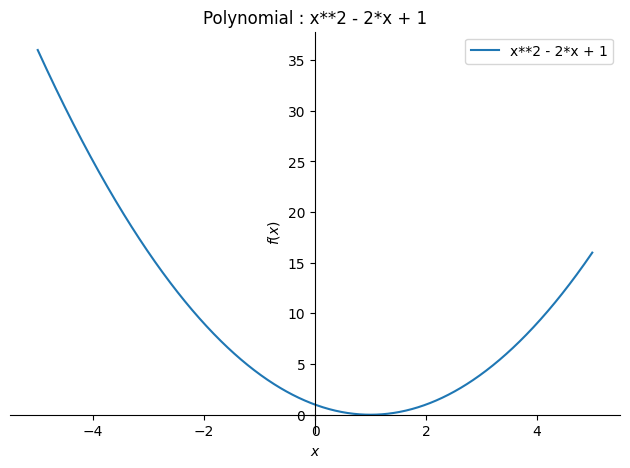

In [ ]:
f = x**2 - 2*x + 1
plt.figure(figsize=(5,5))
p = sp.plot(
    f,
    (x, -5, 5),
    show=True,
    legend=True,
    title="Polynomial : x**2 - 2*x + 1",
)

<Figure size 500x500 with 0 Axes>

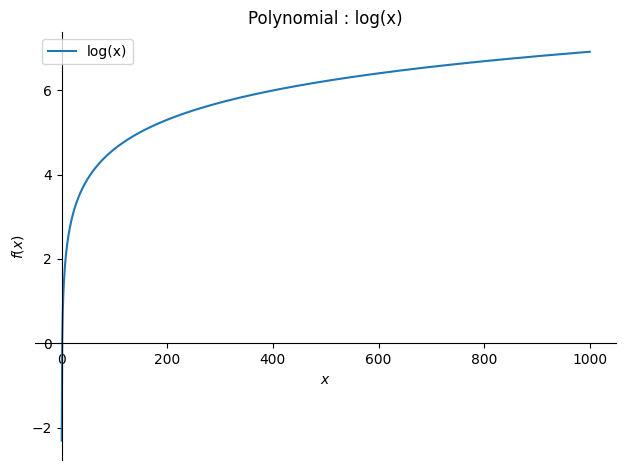

In [ ]:
f = sp.log(x)
plt.figure(figsize=(5,5))
p = sp.plot(
    f,
    (x, 0.1, 1000),
    show=True,
    legend=True,
    title="Polynomial : log(x)",
)

<Figure size 500x500 with 0 Axes>

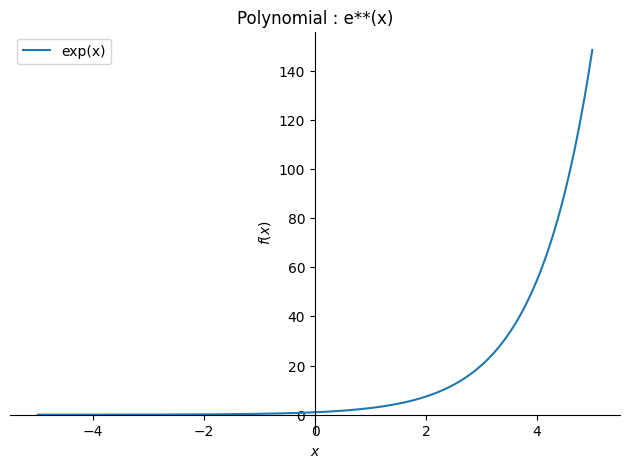

In [ ]:
f = sp.exp(x)
plt.figure(figsize=(5,5))
p = sp.plot(
    f,
    (x, -5, 5),
    show=True,
    legend=True,
    title="Polynomial : e**(x)",
)

<Figure size 500x500 with 0 Axes>

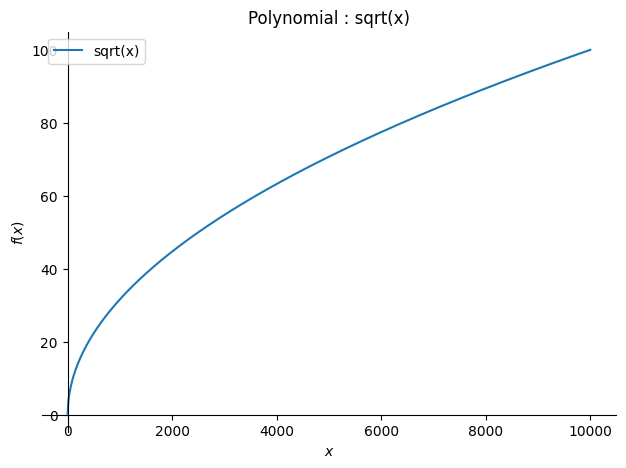

In [ ]:
f = sp.sqrt(x)
plt.figure(figsize=(5,5))
p = sp.plot(
    f,
    (x, 0.1, 10000),
    show=True,
    legend=True,
    title="Polynomial : sqrt(x)",
)

#### Concept of Rate of change

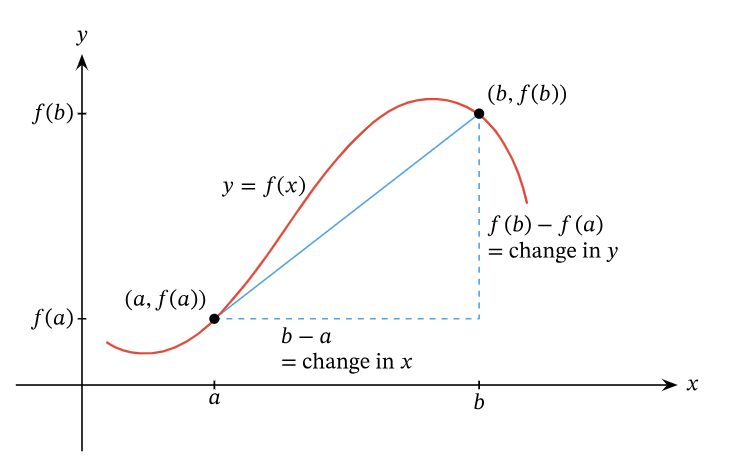

#### Derivative of a function

**Aplications of Slopes, derivatives, partial derivatives for uni and multivariate functions**

1. Backpropagation: In neural networks, gradients with respect to multiple parameters are computed using partial derivatives.
2. Optimization: The gradients help in understanding and optimizing complex models.

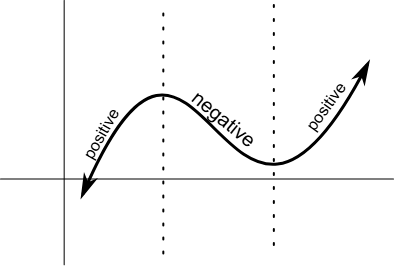

In [ ]:
import sympy as sp

In [ ]:
# Define a symbolic variable and function
x = sp.symbols('x')
f = sp.sin(x) * sp.exp(x)

In [ ]:
# Compute derivative
f_prime = sp.diff(f, x)
print("Function f(x) =", f)
print("Derivative f'(x) =", f_prime)

Function f(x) = exp(x)*sin(x)
Derivative f'(x) = exp(x)*sin(x) + exp(x)*cos(x)


In [ ]:
# Evaluate derivative at a point, say x = 1
f_prime_val = f_prime.subs(x, 1)
print("f'(1) =", f_prime_val)

f'(1) = E*cos(1) + E*sin(1)


#### Slope at a point

In [ ]:
y = 3 * x**2 + 7

In [ ]:
dy_dx = sp.diff(y, x)


In [ ]:
x0 = 2
slope = dy_dx.subs(x, x0)
# Compute the function value at x0.
y_at_x0 = y.subs(x, x0)
y_at_x0

19

In [ ]:
tangent_line = y_at_x0 + slope * (x - x0)
tangent_line

12*x - 5

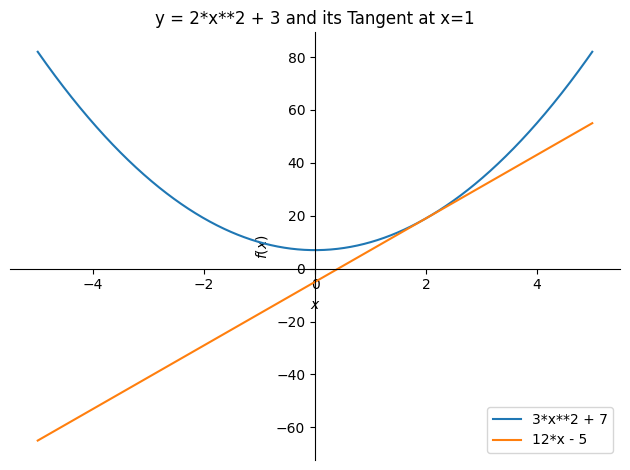

In [ ]:
p = sp.plot(
    y,
    tangent_line,
    (x, -5, 5),
    show=True,
    legend=True,
    title="y = 2*x**2 + 3 and its Tangent at x=1"
)

#### Critical Points

In [ ]:
# Define a new function: f(x) = x^3 - 6x^2 + 9x + 15
f_expr = x**3 - 6*x**2 + 9*x + 15

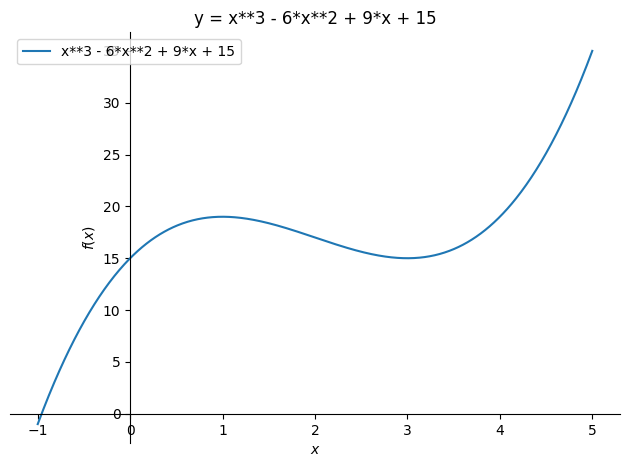

In [ ]:
p = sp.plot(
    f_expr,
    (x, -1, 5),
    show=True,
    legend=True,
    title="y = x**3 - 6*x**2 + 9*x + 15"
)

In [ ]:
# Compute its first derivative
f_expr_prime = sp.diff(f_expr, x)

In [ ]:
# Solve for critical points: f'(x) = 0
critical_points = sp.solve(f_expr_prime, x)
print("Critical Points:", critical_points)

Critical Points: [1, 3]


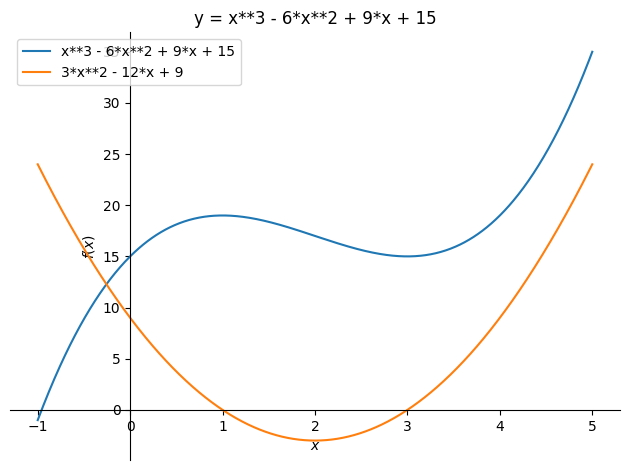

In [ ]:
p = sp.plot(
    f_expr,
    f_expr_prime,
    (x, -1, 5),
    show=True,
    legend=True,
    title="y = x**3 - 6*x**2 + 9*x + 15"
)

In [ ]:
# Use the second derivative test
f_expr_second = sp.diff(f_expr_prime, x)
print("Second Derivative:", f_expr_second)

Second Derivative: 6*x - 12


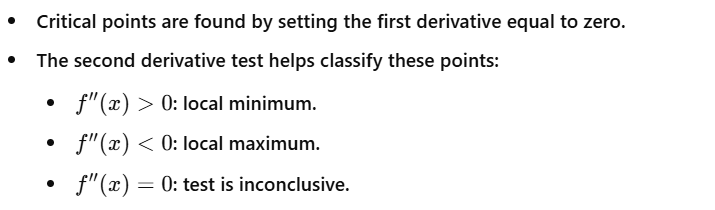

In [ ]:
# Evaluate the second derivative at the critical points
for cp in critical_points:
    second_deriv_val = f_expr_second.subs(x, cp)
    if second_deriv_val > 0:
        nature = "Local Minimum"
    elif second_deriv_val < 0:
        nature = "Local Maximum"
    else:
        nature = "Saddle or Inconclusive"
    print(f"At x = {cp}: Second derivative = {second_deriv_val}, {nature}")

At x = 1: Second derivative = -6, Local Maximum
At x = 3: Second derivative = 6, Local Minimum


#### Multivariate Calculus

In [ ]:
# Define a multivariate function, e.g. f(x,y) = x^2*y + y^3
x, y = sp.symbols('x y') # Define symbolic variables for x and y.
f_xy = x**2 + y**2
f_xy

x**2 + y**2

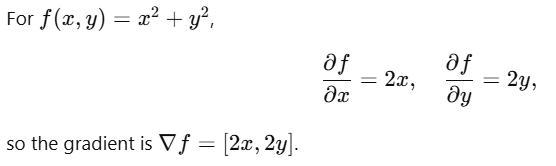

In [ ]:
# Compute the partial derivative with respect to x
partial_x = sp.diff(f_xy, x)
partial_x

2*x

In [ ]:
partial_y = sp.diff(f_xy, y)
partial_y

2*y

In [ ]:
# Convert the symbolic function and its derivatives into numerical functions.
f_func = sp.lambdify((x, y), f_xy, 'numpy')
grad_x = sp.lambdify((x, y), partial_x, 'numpy')
grad_y = sp.lambdify((x, y), partial_y, 'numpy')

In [ ]:
# Define a grid of (x, y) values for plotting.
x_vals = np.linspace(-3, 3, 50)
y_vals = np.linspace(-3, 3, 50)
X, Y = np.meshgrid(x_vals, y_vals)

In [ ]:
# Evaluate the function and its gradient over the grid.
Z = f_func(X, Y)          # Function values.
U = grad_x(X, Y)          # x-component of gradient.
V = grad_y(X, Y)          # y-component of gradient.

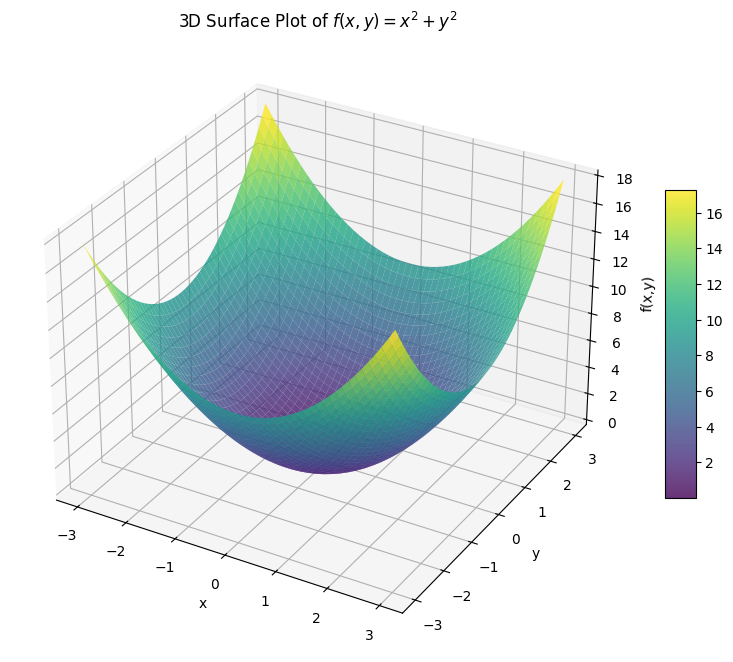

In [ ]:
# Import the 3D plotting toolkit
from mpl_toolkits.mplot3d import Axes3D  # (this import registers the 3D projection)

# Create a new figure for the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface of f(x, y) = x^2 - y^2 using the meshgrid defined earlier.
surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none', alpha=0.8)

# Add a color bar to indicate function values.
fig.colorbar(surface, shrink=0.5, aspect=10)

# Set plot title and axis labels.
ax.set_title(r"3D Surface Plot of $f(x,y)=x^2+y^2$")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("f(x,y)")

plt.show()

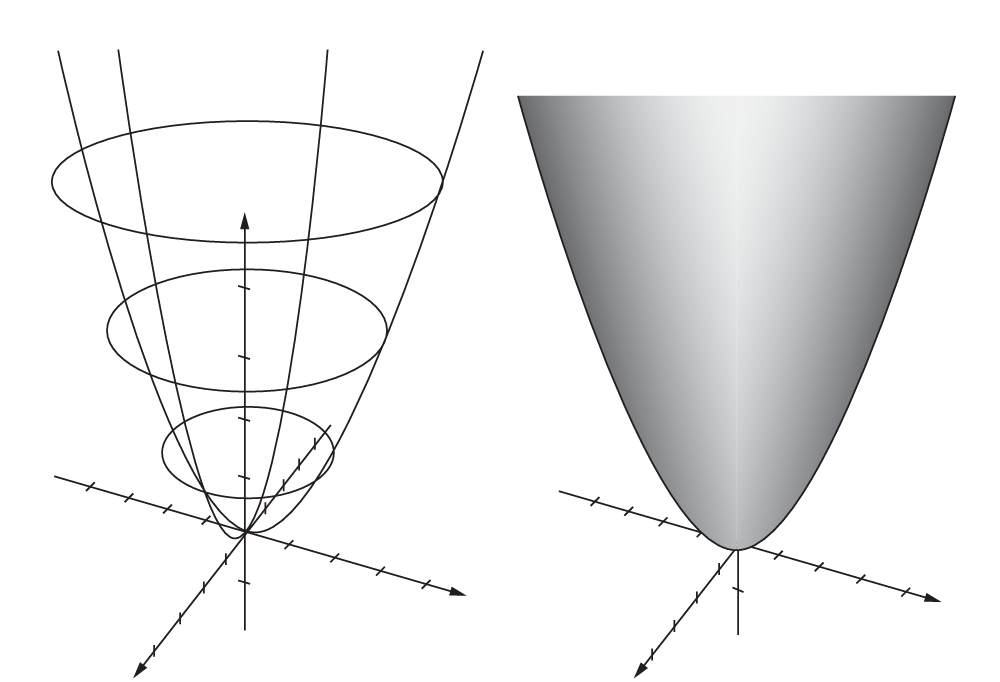

Text(0, 0.5, 'y')

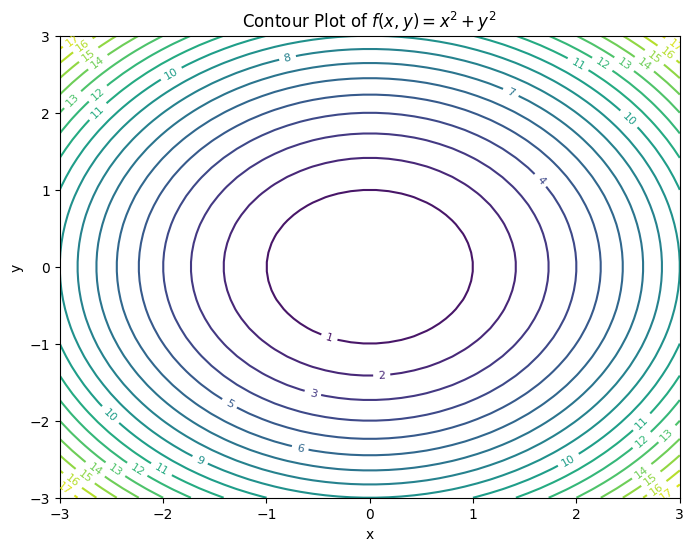

In [ ]:
# Create a contour plot for the function.
plt.figure(figsize=(8,6))
contour = plt.contour(X, Y, Z, levels=20, cmap='viridis')
plt.clabel(contour, inline=True, fontsize=8)
plt.title(r'Contour Plot of $f(x,y)=x^2+y^2$')
plt.xlabel('x')
plt.ylabel('y')

####Quiz on calculus

In gradient descent, what is updated using the derivative of the loss function?

- A) Input data
- B) Model parameters (weights and biases)
- C) Activation functions
- D) Learning rate

-----

The derivative of the sigmoid function σ(x) simplifies to:
- A) σ(x)
- B) 1−σ(x)
- C) σ(x)(1−σ(x))

-----

The second derivative of a function helps in:

- A) Finding minima and maxima
- B) Avoiding overfitting
- C) Computing the loss function
- D) Increasing learning rate

------

Partial derivatives in ML help in:

- A) Finding global minima
- B) Computing gradient updates
- C) Regularization
- D) Increasing dataset size

------

Backpropagation in deep networks calculates gradients for:
- A) Loss function only
- B) Every layer’s weights
- C) Only the first layer
- D) Biases only